In [8]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from utils_functions import UtilsFunctions

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = X["mean smoothness"].values
X = X.drop(columns=["mean smoothness"])
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [16]:
pipeline1 = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsRegressor())])

pipeline1.fit(X_train, y_train)

,steps,"[('scaler', ...), ('knn', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30


In [17]:
predictions = pipeline1.predict(X_test)
UtilsFunctions.get_regression_metrics(y_test, predictions)

{'r2': 0.6327163682250807,
 'RMSE': 0.008697523535416434,
 'MAE': 0.00675480701754386}

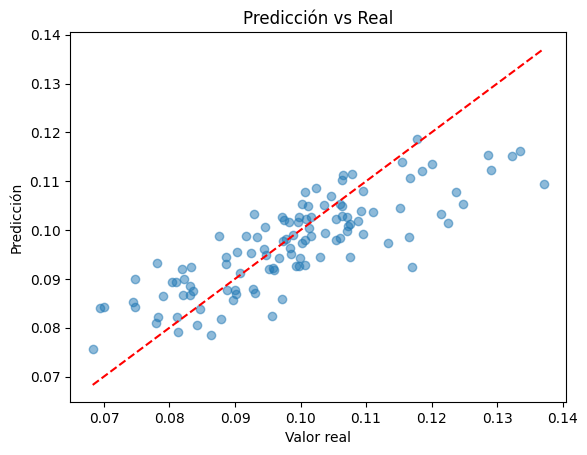

In [18]:
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("Predicción vs Real")
plt.show()

In [20]:
pipeline2 = Pipeline([
    ("scaler", StandardScaler()),
    ("RF", RandomForestRegressor(n_estimators=10000, n_jobs=-1))])

pipeline2.fit(X_train, y_train)

,steps,"[('scaler', ...), ('RF', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,10000
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2


In [21]:
predictions = pipeline2.predict(X_test)
UtilsFunctions.get_regression_metrics(y_test, predictions)

{'r2': 0.7779994534893221,
 'RMSE': 0.0067619483214152384,
 'MAE': 0.005105301956140529}

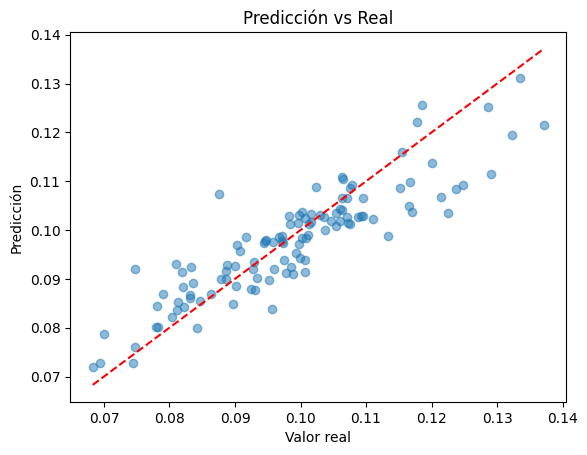

In [22]:
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--")
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("Predicción vs Real")
plt.show()